In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
import squarify
warnings.filterwarnings('ignore')

In [3]:
store_sales_df = pd.read_csv("store_data.csv")
items_df = pd.read_csv("datasets/items.csv")

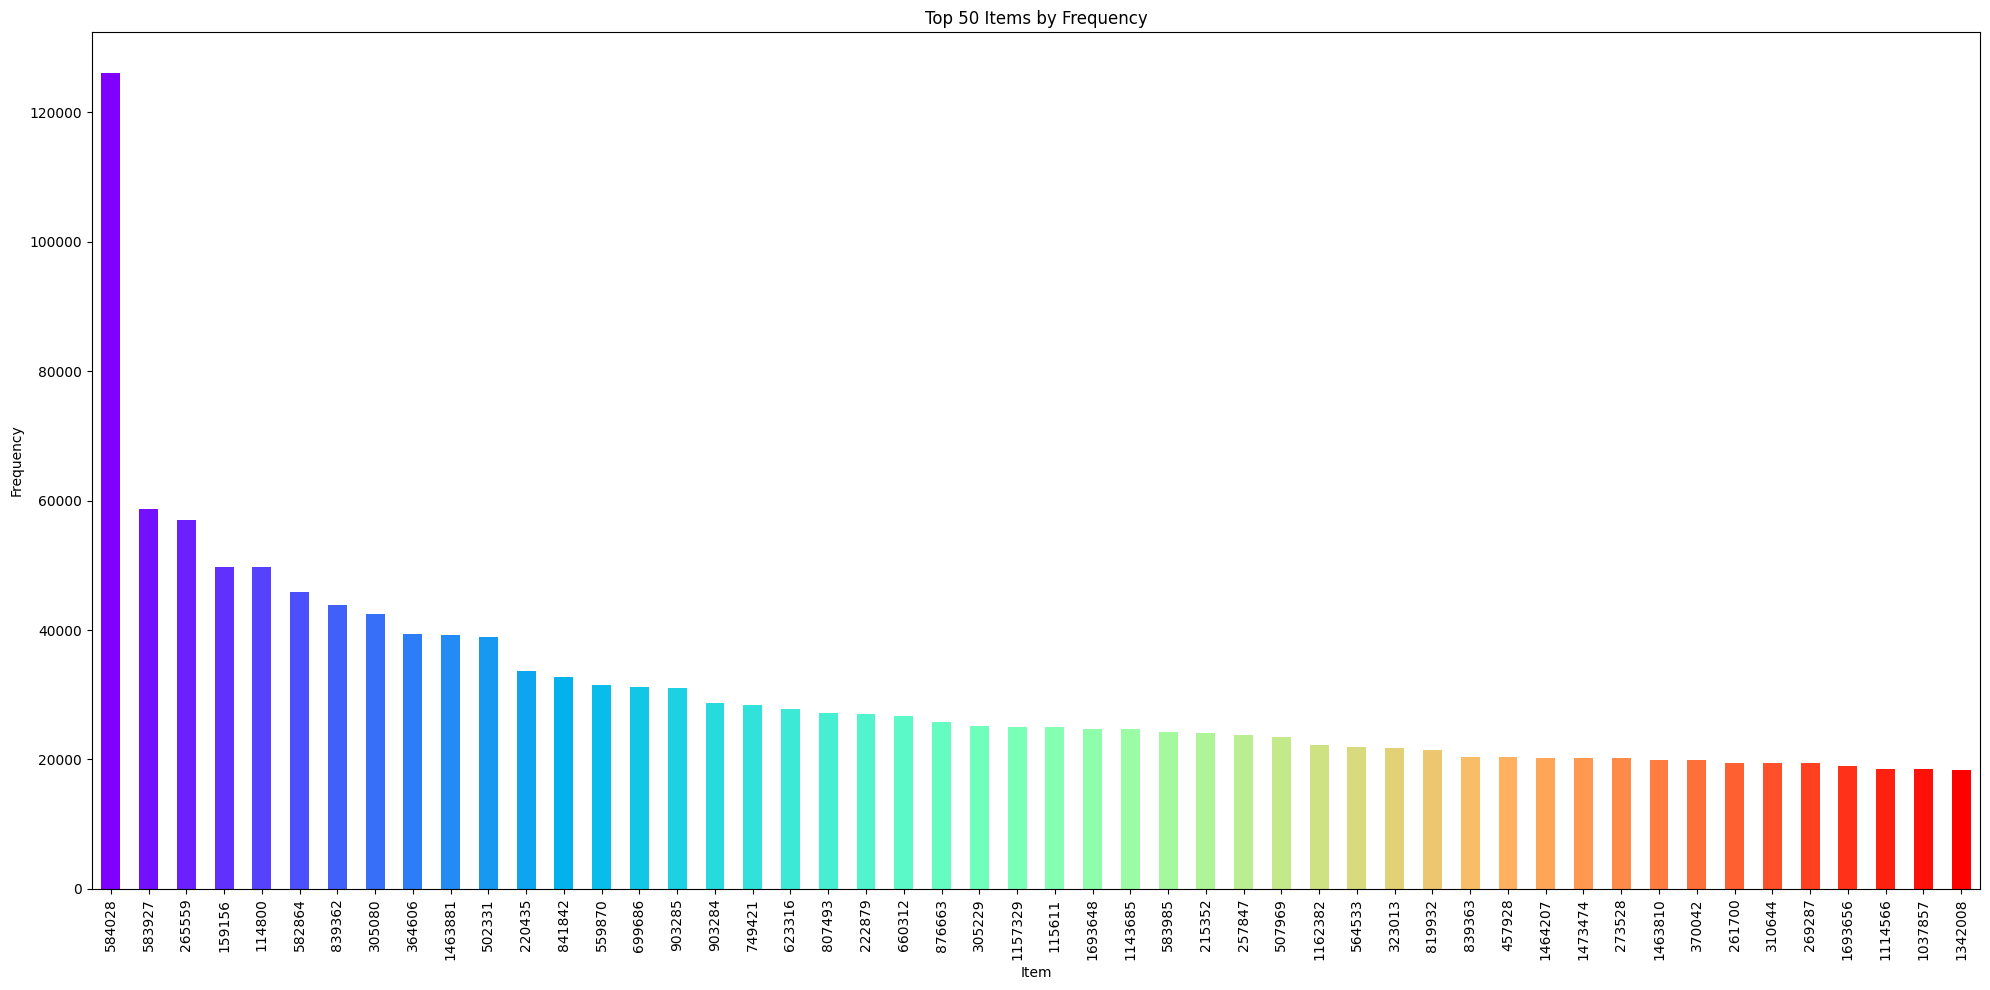

In [3]:
df_grouped = store_sales_df.groupby('item_nbr')['unit_sales'].sum().reset_index(name='frequency_sum')
df_sorted = df_grouped.sort_values('frequency_sum', ascending=False)
top_50 = df_sorted.head(50)
cmap = plt.cm.get_cmap('rainbow', 50)
colors = [cmap(i) for i in range(50)]
top_50_series = top_50.set_index('item_nbr')['frequency_sum']
top_50_series.plot(kind='bar', figsize=(20, 10), color=colors)
plt.title('Top 50 Items by Frequency')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

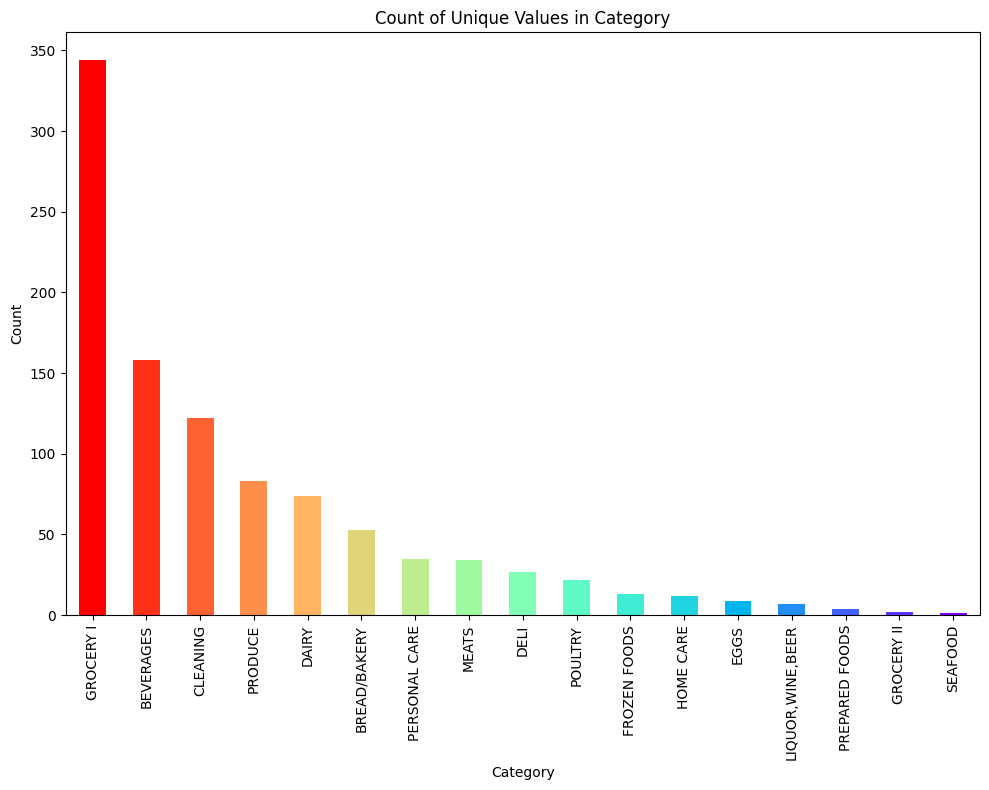

In [4]:
top_1000 = df_sorted.head(1000)
new_df = pd.merge(top_1000, items_df, on = 'item_nbr', how = 'inner')
counts = new_df['family'].value_counts()
n_bars = len(counts)
cmap = plt.cm.get_cmap('rainbow', n_bars)
colors = [cmap(i) for i in range(n_bars)]
colors = colors[::-1]
plt.figure(figsize=(10, 8))
counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

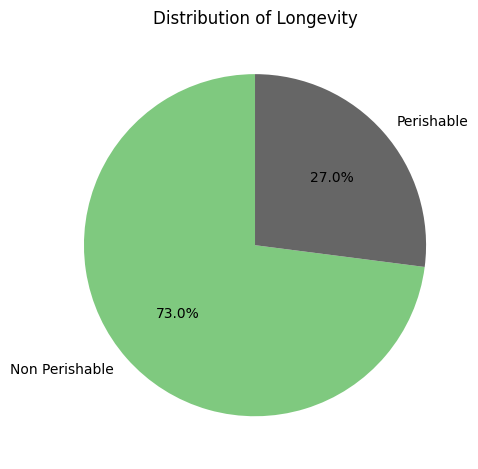

In [11]:
replacement_dict = {1: 'Perishable', 0: 'Non Perishable'}
store_sales_perish_df = store_sales_df.copy()
store_sales_perish_df['perishable'] = store_sales_perish_df['perishable'].replace(replacement_dict)
counts = store_sales_perish_df['perishable'].value_counts()
plt.figure(figsize=(5, 5))
counts.plot(kind='pie', colormap='Accent', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Longevity')
plt.ylabel('')
plt.tight_layout()
plt.show()

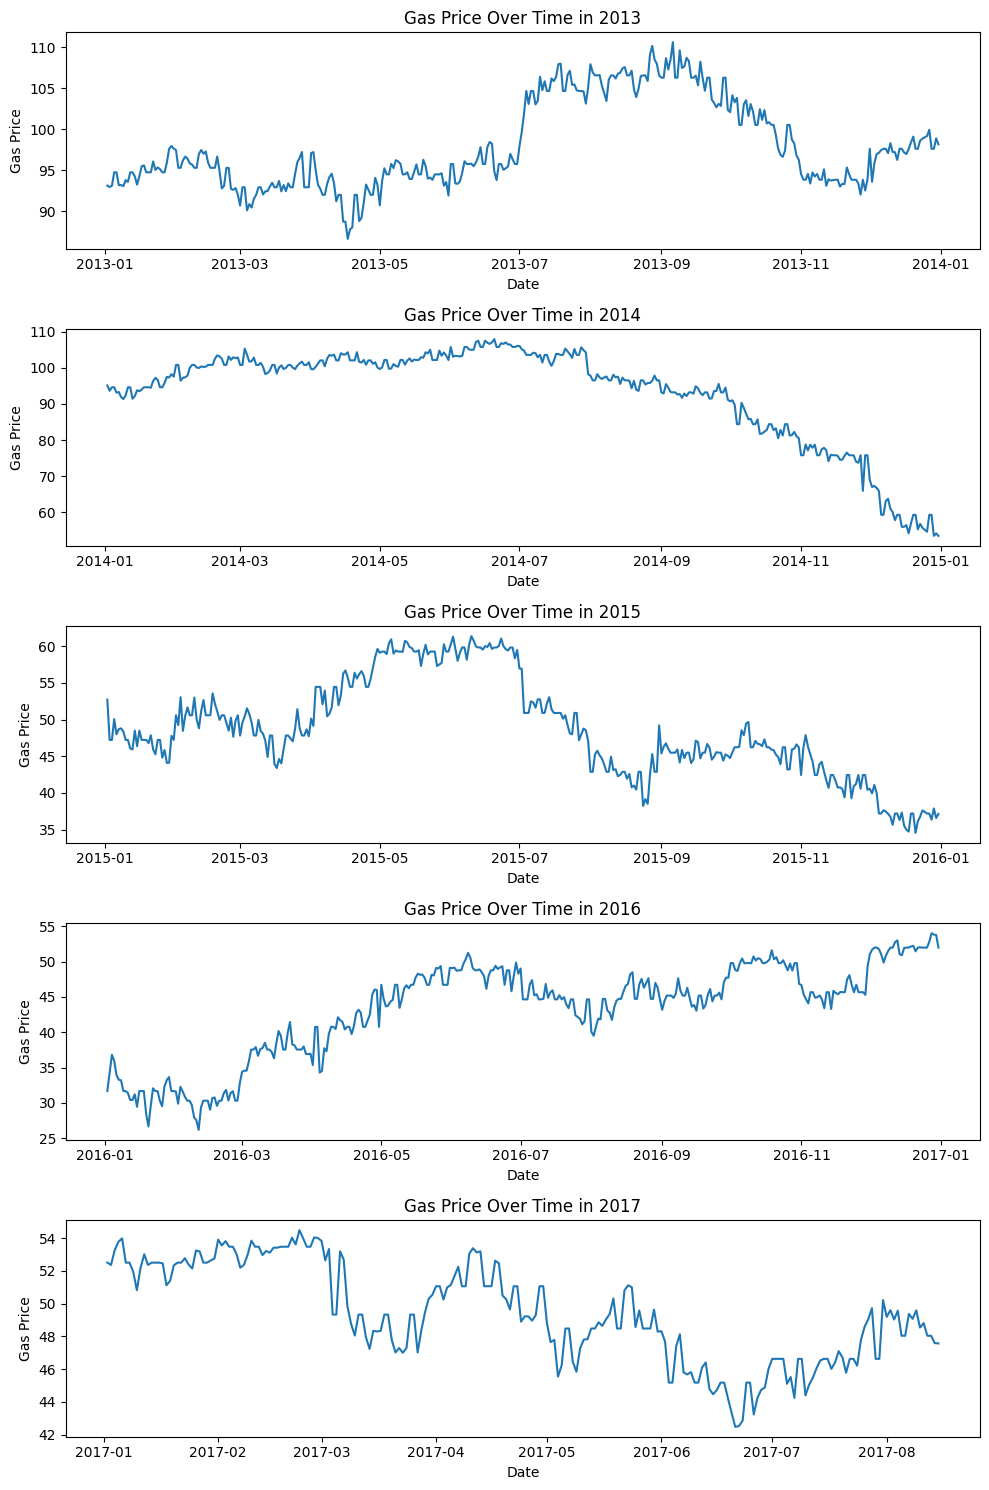

In [6]:
store_sales_oil_df = store_sales_df.copy()
store_sales_oil_df['date'] = pd.to_datetime(store_sales_oil_df['date'])
store_sales_oil_df['year'] = store_sales_oil_df['date'].dt.year
store_sales_oil_df = store_sales_oil_df.sort_values('date')
years = store_sales_oil_df['year'].unique()

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(10, 15))

for ax, yr in zip(axes, years):
    subset = store_sales_oil_df[store_sales_oil_df['year'] == yr]
    ax.plot(subset['date'], subset['dcoilwtico'])
    ax.set_title(f'Gas Price Over Time in {yr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Gas Price')

plt.tight_layout()
plt.show()

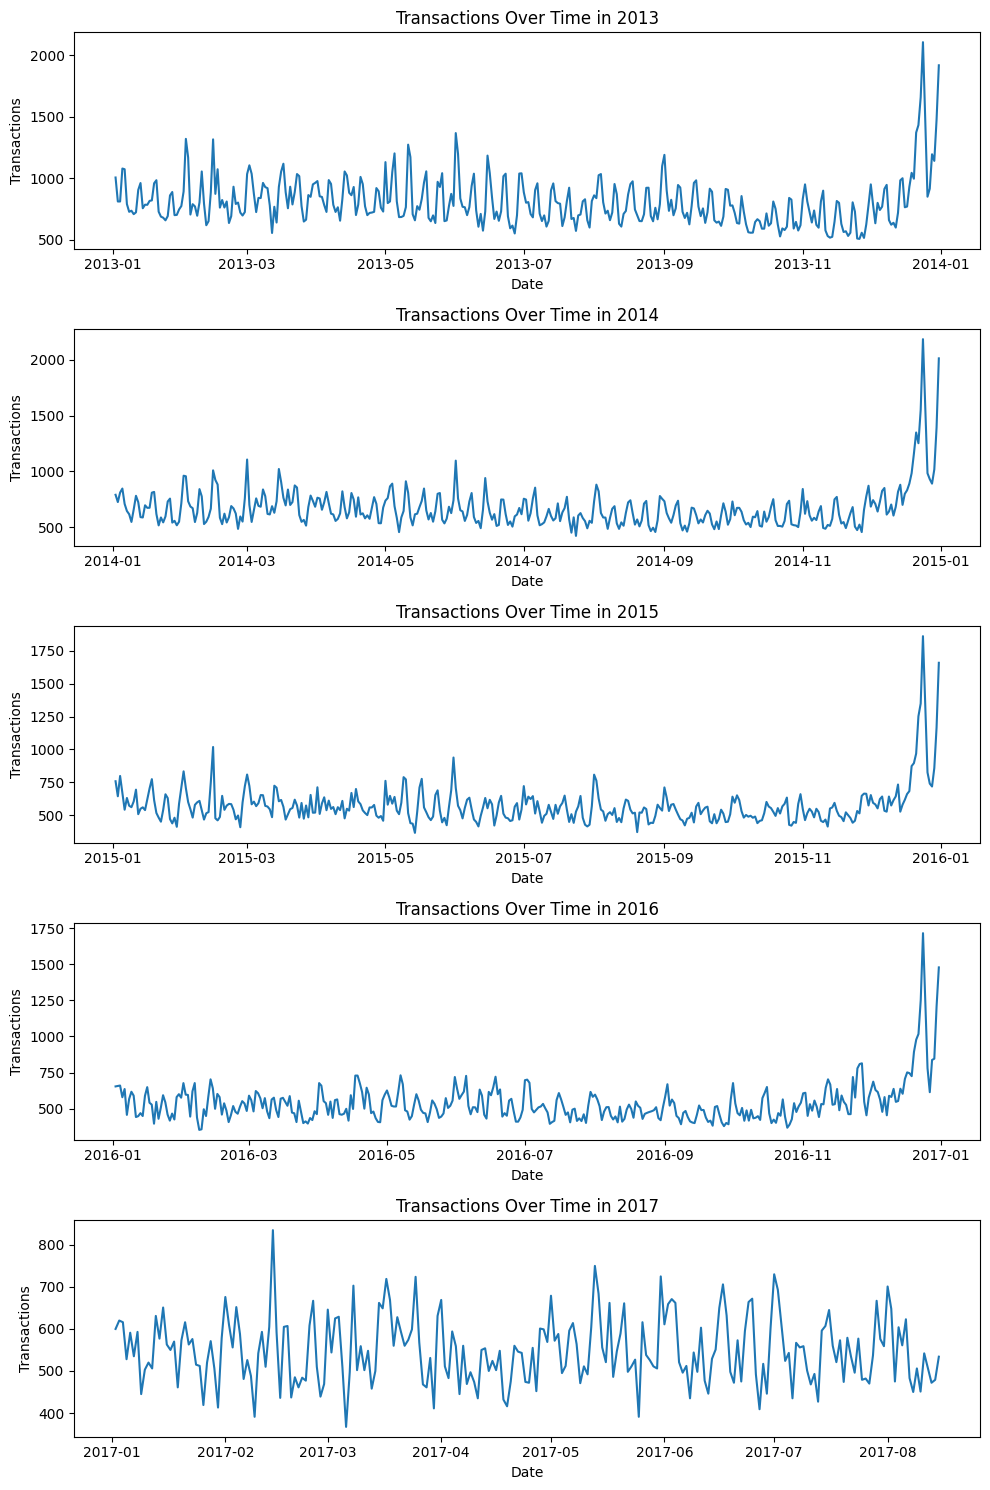

In [7]:
store_sales_transactions_df = store_sales_df.copy()
store_sales_transactions_df['date'] = pd.to_datetime(store_sales_transactions_df['date'])
store_sales_transactions_df['year'] = store_sales_transactions_df['date'].dt.year
store_sales_transactions_df = store_sales_transactions_df.sort_values('date')
years = store_sales_transactions_df['year'].unique()

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(10, 15))

for ax, yr in zip(axes, years):
    subset = store_sales_transactions_df[store_sales_transactions_df['year'] == yr]
    ax.plot(subset['date'], subset['transactions'])
    ax.set_title(f'Transactions Over Time in {yr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Transactions')

plt.tight_layout()
plt.show()

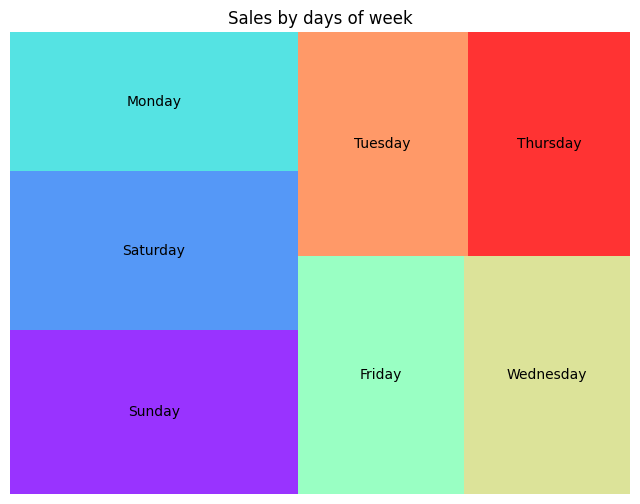

In [13]:
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
counts_df = store_sales_df['day_of_week'].value_counts().to_frame()
counts_df.reset_index(inplace=True)
counts_df['day_of_week'] = counts_df['day_of_week'].map(day_map)
counts_df.columns = ['Value', 'Count']
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('rainbow', 7)
colors = [cmap(i) for i in range(7)]
squarify.plot(sizes=counts_df['Count'], label=counts_df['Value'], color=colors, alpha=0.8)
plt.axis('off') 
plt.title('Sales by days of week')
plt.show()

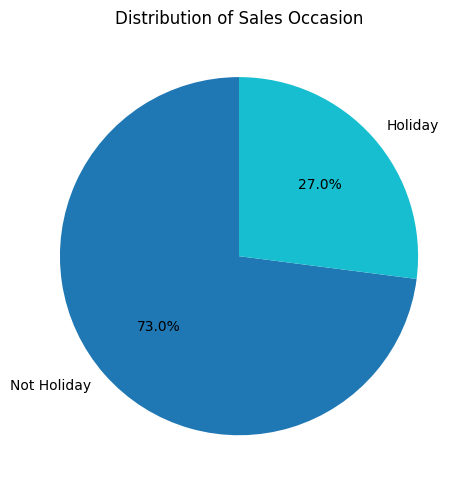

In [12]:
replacement_dict = {1: 'Holiday', 0: 'Not Holiday'}
store_sales_holidays_df = store_sales_df.copy()
store_sales_holidays_df['perishable'] = store_sales_holidays_df['perishable'].replace(replacement_dict)
counts = store_sales_holidays_df['perishable'].value_counts()
plt.figure(figsize=(5, 5))
counts.plot(kind='pie', colormap='tab10', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales Occasion')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [10]:
store_sales_df.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions,dcoilwtico,oilprice_label,...,type_B,type_C,type_D,type_E,holiday,class,perishable,family_encoded,day_of_week,weekly_avg_sales
0,57215563,381401,2013-01-11,26,96995,1.0,0,725,93.60,23,...,False,False,True,False,0,1093,0,12,5,1.000
1,57215564,987905,2013-01-26,26,96995,1.0,0,862,94.76,23,...,False,False,True,False,0,1093,0,12,6,1.000
2,57215565,1611042,2013-02-10,26,96995,2.0,0,795,95.31,24,...,False,False,True,False,0,1093,0,12,7,1.333
3,57215566,2020735,2013-02-20,26,96995,1.0,0,813,94.92,23,...,False,False,True,False,0,1093,0,12,3,1.250
4,57215567,2610614,2013-03-06,26,96995,2.0,0,842,90.47,22,...,False,False,True,False,0,1093,0,12,3,1.400


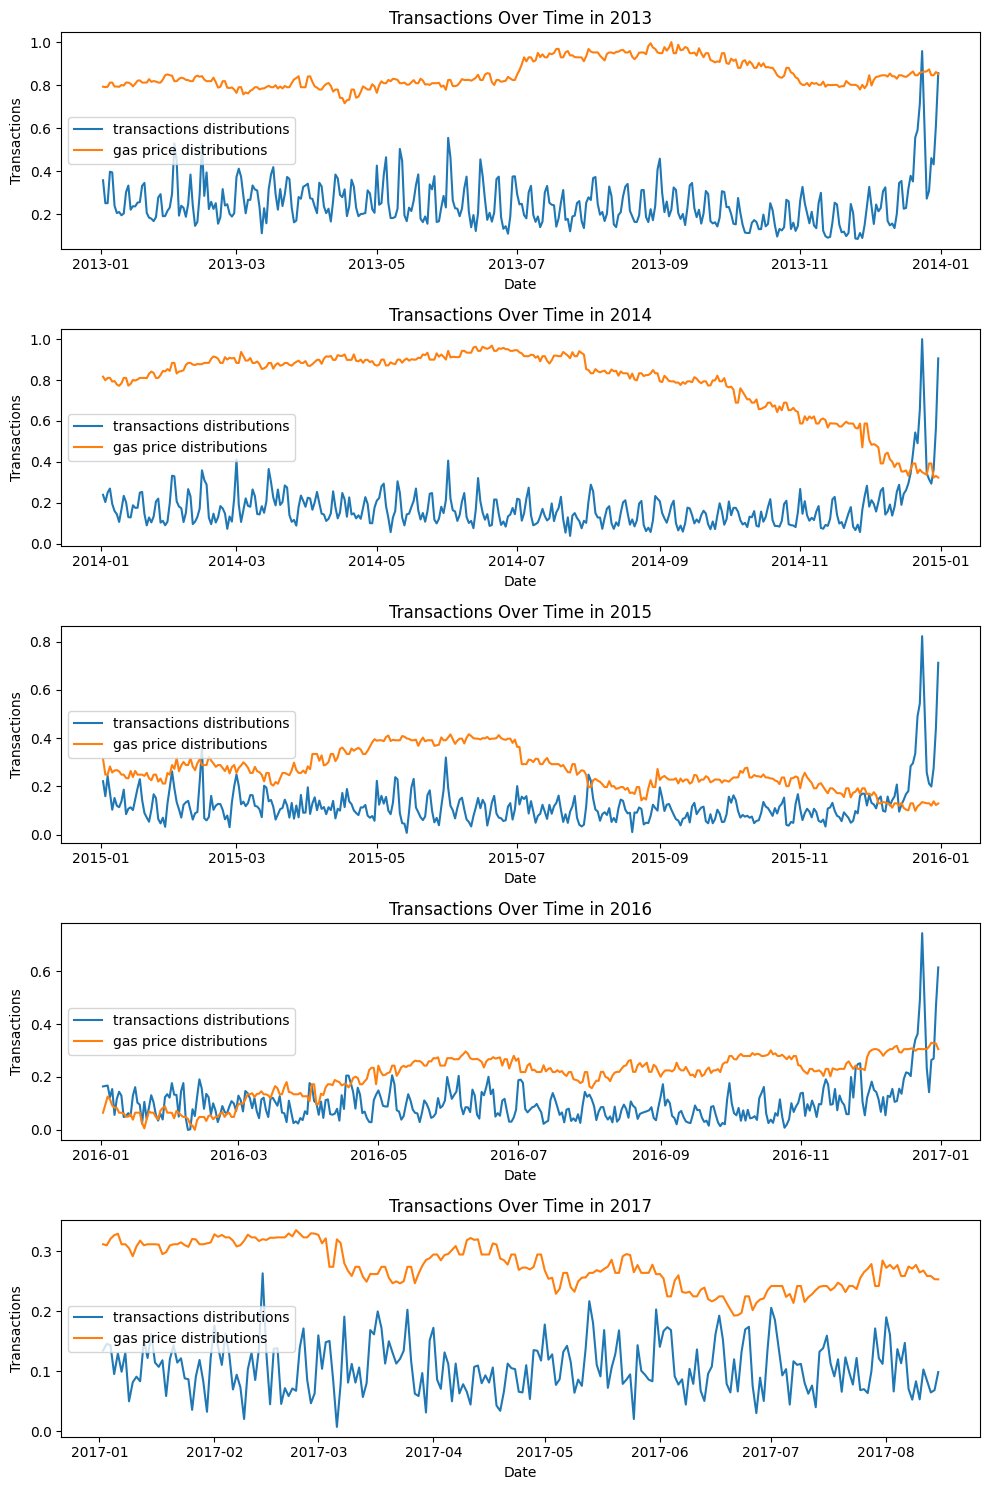

In [9]:
def normalize_max_min(col):
    a_min = col.min()
    a_max = col.max()
    norm_data = (col - a_min) / (a_max - a_min )
    return norm_data
    
store_sales_transactions_df = store_sales_df.copy()
store_sales_transactions_df['transactions_norm'] = normalize_max_min(store_sales_transactions_df['transactions'])
store_sales_transactions_df['date'] = pd.to_datetime(store_sales_transactions_df['date'])
store_sales_transactions_df['year'] = store_sales_transactions_df['date'].dt.year
store_sales_transactions_df = store_sales_transactions_df.sort_values('date')
years = store_sales_transactions_df['year'].unique()
store_sales_oil_df = store_sales_df.copy()
store_sales_oil_df['dcoilwtico_norm'] = normalize_max_min(store_sales_oil_df['dcoilwtico'])
store_sales_oil_df['date'] = pd.to_datetime(store_sales_oil_df['date'])
store_sales_oil_df['year'] = store_sales_oil_df['date'].dt.year
store_sales_oil_df = store_sales_oil_df.sort_values('date')

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(10, 15))

for ax, yr in zip(axes, years):
    subset = store_sales_transactions_df[store_sales_transactions_df['year'] == yr]
    ax.plot(subset['date'], subset['transactions_norm'], label = 'transactions distributions')
    subset = store_sales_oil_df[store_sales_oil_df['year'] == yr]
    ax.plot(subset['date'], subset['dcoilwtico_norm'], label = 'gas price distributions')
    ax.set_title(f'Transactions Over Time in {yr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Transactions')
    ax.legend(loc="center left")

plt.tight_layout()
plt.show()
